In [1]:
import numpy as np
import scipy.spatial as sp
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib notebook

In [2]:
def sq_exp(X, X_star, length_scale):
    """
    Args:
        X (nparray): (n, d)
        X_star (nparray): (m, d)
        length_scale (float): 
    """
    dist = sp.distance.cdist(X, X_star)
    k1 = np.exp(-dist**2/(2*length_scale**2))
    
    return k1

def sq_exp_period(X, X_star, length_scale):
    """
    Args:
        X (nparray): (n, d)
        X_star (nparray): (m, d)
        length_scale (float): 
    """
    p = 2
    dist = sp.distance.cdist(X, X_star)
    k1 = np.exp(-dist**2/(2*length_scale**2))
    k2 = np.exp(-2/length_scale**2*np.sin(np.pi*dist/p)**2)
    
    poly = polynomial(X, X_star, 1)

    return k2 + poly

def polynomial(X, X_star, d):
    c = 5
    return (np.matmul(X, X_star.T) + c)**d

def brownian(X, X_star, _):
    """
    Args:
        X (nparray): (n, d)
        X_star (nparray): (m, d)
        length_scale (float): 
    """
    arr = np.empty((X.shape[0], X_star.shape[0]))
    for i in range(X.shape[0]):
        for j in range(X_star.shape[0]):
            arr[i,j] = min(i+1,j+1)

    return arr

def sample_prior(X, length_scale, N, kernel=sq_exp):
    """
    Args:
        X (nparray): (n, d)
        length_scale (float): 
        N (int): 
    """
    n = X.shape[0]
    k = kernel(X, X, length_scale)
    samples = np.random.multivariate_normal([0]*n, k, N)
    return samples

def predictive_mean(X, y, X_star, length_scale, sigma, kernel=sq_exp):
    """
    Args:
        X (nparray): (n, d)
        y (nparray): (n, 1)
        X_star (nparray): (m, d)
        length_scale (float): 
        sigma (float)
    """
    n = X.shape[0]
    K_xstar_x = kernel(X_star, X, length_scale)
    K_x_x = kernel(X, X, length_scale)

    return \
    np.matmul(K_xstar_x, np.matmul(np.linalg.inv(K_x_x+sigma**2*np.eye(n)), y))

def predictive_cov(X, y, X_star, length_scale, sigma,kernel=sq_exp):
    """
    Args:
        X (nparray): (n, d)
        y (nparray): (n, 1)
        X_star (nparray): (m, d)
        length_scale (float): 
        sigma (float):
    """

    n = X.shape[0]
    K_xstar_xstar = kernel(X_star, X_star, length_scale)
    K_xstar_x = kernel(X_star, X, length_scale)
    K_x_x = kernel(X, X, length_scale)

    return K_xstar_xstar - np.matmul(K_xstar_x,
            np.matmul(np.linalg.inv(K_x_x + sigma**2*np.eye(n)), K_xstar_x.T))



<IPython.core.display.Javascript object>


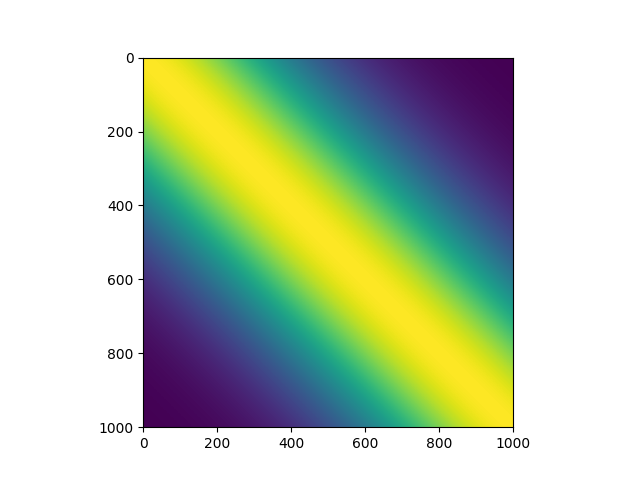

<IPython.core.display.Javascript object>


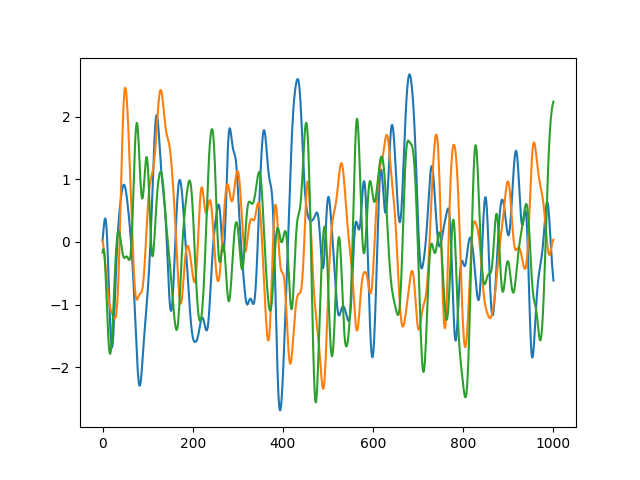

(1001, 1001)


In [7]:
if __name__ == '__main__':
    
    # Load test data   
    train_inputs = np.array([0]).reshape((-1,1))
    train_outputs = np.array([0]).reshape((-1,1))/3
    
    plot_test_inputs = Xs = np.linspace(0,10,1001).reshape(-1,1)
    mat  = sq_exp(Xs,Xs,3)
    plt.figure()
    plt.imshow(mat, interpolation='nearest', cmap='viridis')
    
    plt.figure()
        
#     ls = 0.6
#     sigma_n = 0.4
#     mean = predictive_mean(train_inputs, train_outputs, plot_test_inputs, 
#             ls, sigma_n, kernel=sq_exp_period).reshape((-1,))
#     cov = predictive_cov(train_inputs, train_outputs, plot_test_inputs, 
#             ls, sigma_n, kernel=sq_exp_period)
#     var = np.diag(cov)

#     plt.plot(train_inputs, train_outputs, 'k*')
#     plt.plot(plot_test_inputs, mean, 'r', alpha=0.5)
#     plt.fill_between(plot_test_inputs.reshape((-1,)), 
#             mean + np.sqrt(var), mean - np.sqrt(var),color='red',alpha=0.1)
    
    ls = 0.1
    sigma_n = 0.1
    mean = predictive_mean(train_inputs, train_outputs, plot_test_inputs, 
            ls, sigma_n, kernel=sq_exp).reshape((-1,))
    cov = predictive_cov(train_inputs, train_outputs, plot_test_inputs, 
            ls, sigma_n, kernel=sq_exp)
    var = np.diag(cov)

#     plt.plot(train_inputs, train_outputs, 'k*')
#     plt.plot(plot_test_inputs, mean, 'b', alpha=0.5)
#     plt.fill_between(plot_test_inputs.reshape((-1,)), 
#             mean + np.sqrt(var), mean - np.sqrt(var), color='blue', alpha=0.1)
    
#     ls = 1
#     sigma_n = 0.4
#     mean = predictive_mean(train_inputs, train_outputs, plot_test_inputs, 
#             ls, sigma_n, kernel=polynomial).reshape((-1,))
#     cov = predictive_cov(train_inputs, train_outputs, plot_test_inputs, 
#             ls, sigma_n, kernel=polynomial)
#     var = np.diag(cov)

#     plt.plot(train_inputs, train_outputs, 'k*')
#     plt.plot(plot_test_inputs, mean, 'g', alpha=0.5)
#     plt.fill_between(plot_test_inputs.reshape((-1,)), 
#             mean + np.sqrt(var), mean - np.sqrt(var), color='green', alpha=0.1)
    
    
#     # Q1 samples
#     samples = np.random.multivariate_normal(mean, cov, 5)
#     plt.plot(train_inputs, train_outputs, 'k*')
#     [plt.plot(plot_test_inputs, samples[i, :]) for i in range(5)]


#     # Q2
    print(cov.shape)
    
    df = pd.DataFrame()

    plot_test_inputs = np.linspace(0, 1000, 1001).reshape(-1,1)
    for d in range(1,4):
        samples = np.random.multivariate_normal([0]*1001, cov, 1)
        df[d] = samples.flatten()
        [plt.plot(plot_test_inputs, samples[i, :]) for i in range(1)]
    
    plt.show()

In [4]:
df.head()

,1,2,3
0,-0.200994,0.083338,0.117937
1,-0.523065,0.272057,0.240380
2,-0.342872,-0.417109,0.990442
3,-0.904802,1.498071,-1.639980
4,0.501013,0.064321,-0.309632


In [8]:
df.to_csv("path.csv")